In [1]:
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt

Homework 5 - NUCE 2100

**Dane Sabo**

*October 1st, 2024*

# Problem 1:

The neutron flux in a bare spherical reactor of radius 50 cm is given by 

$$ \phi(r) = 5x10^{13} \frac{\sin(0.0628r)}{r} \frac{\text{neutrons}}{\text{cm}^2 \times \text{sec}} $$

where r is measured from teh center of the reactor. The diffusion coefficient for the system is 0.80 cm.

## What is the maximum value of flux in the reactor?

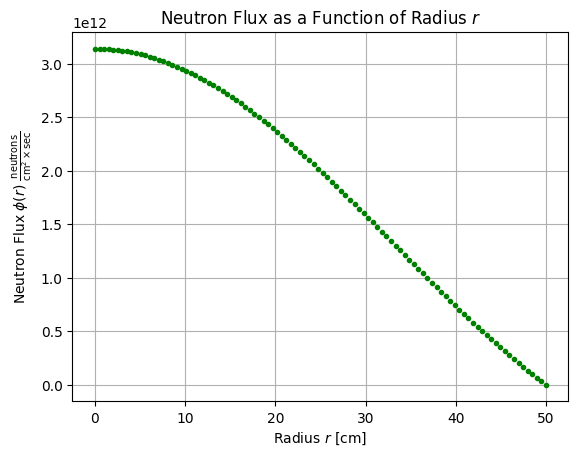

In [2]:
neutron_flux = lambda r: 5e13 * np.sin(0.0628*r)/r #neutrons/(cm^2-s)

r_range = np.linspace(1e-5, 50, 100)
flux_range = neutron_flux(r_range)

plt.figure(); plt.title("Neutron Flux as a Function of Radius $r$")
plt.xlabel('Radius $r$ [cm]'); plt.ylabel('Neutron Flux $\\phi(r)$ $\\frac{\\text{neutrons}}{\\text{cm}^2 \\times \\text{sec}}$')
plt.grid('both')
plt.plot(r_range, flux_range, '.g')

Flux technically isn't defined at the center of the reactor, but neutron flux is greatest as r approaches 0.

## Calculate the neutron current density  as a function of position in the reactor.

In [3]:
J, r, a = sm.symbols('J, r, a')
D = 0.80 #cm

psi = a*sm.sin(0.0628*r)/r

#Phi only depends on r.
#Therefore, we can take the gradient with only the partial w.r.t. r.
diffusion_approx = sm.Eq(J, -D*psi.diff(r))
display(diffusion_approx, 'neutrons/cm^2/s')

Eq(J, -0.05024*a*cos(0.0628*r)/r + 0.8*a*sin(0.0628*r)/r**2)

'neutrons/cm^2/s'

Where $a = 5\times 10^{13}$ and J is in the $\hat e_r$ direction.

## How many neutrons escape from the reactor per second?
The neutrons escaping from the reactor per second is equal to the neutron current density multiplied by the area:

$$ \int_A \left( J(\vec r, t) \cdot n \right) dA $$

We can see that our neutron current density is always normal to the surface, and our surface is at a constant value of r. This lets us simplify our expression:

$$ \int_A \left( J(\vec r, t) \cdot n \right) dA \rightarrow 
A J(r,t)|_{r = 50 \text{[cm]}}$$

In [4]:
a = 5e13
J = lambda r: -0.05024*a*np.cos(0.0628*r)/50 + 0.8*a*np.sin(0.0628*r)/r**2
A = lambda r: 4*np.pi*r**2

print(f'There are {J(50)*A(50):.3e} neutrons leaking per second from the reactor.')

There are 1.579e+15 neutrons leaking per second from the reactor.


# Problem 2
A bare slab of thickness 2a contains uniformly distributed sources emitting Q neutrons/cm^3/sec. Given the expression for the scalar flux below verify the equation of continuity by computing per unit are of the slab the total number of neutrons

$$ \phi(x) = \frac{Q}{\Sigma_a} \left( 1 - \frac{\cosh(x/L)}{\cosh(a/L) } \right) $$


In [5]:
Q, sigma, x, a, L = sm.symbols('Q, Sigma_a, x, a, L')

phi = Q/sigma*(1-sm.cosh(x/L)/sm.cosh(a/L))

## Produced within the whole slab

$$ 
\begin{align}
\int_V s(\vec r, t) dV &= \int_V Q dV \\
&= \int_A 2aQ dA\\
\text{but assuming per unit area...} \\
&= \frac{d}{dA} \int_A 2aQ dA\\
\int_V s(\vec r, t) dV &=  2aQ \text{ per second per unit area}\\
\end{align}
$$

## Absorbed per second within the slab

$$
\begin{align}
\int_v \Sigma_a(\vec r, t) \phi(\vec r, t) dV &= 
\int_v \Sigma_a(\vec r, t) \frac{Q}{\Sigma_a} \left( 1 - \frac{\cosh(x/L)}{\cosh(a/L)} \right) dV\\
&= \int_{A} \int_x Q \left( 1 - \frac{\cosh(x/L)}{\cosh(a/L)} \right) dxdA\\
\text{and doing things per unit area...}\\
\frac{d}{dA} \left(\int_v \Sigma_a(\vec r, t) \phi(\vec r, t) dV \right) &= \int_x Q \left( 1 - \frac{\cosh(x/L)}{\cosh(a/L)} \right) dx\\
\end{align}
$$
Now we can do this integration for the thickness x using SymPy:

In [6]:
absorption_per_second = sm.integrate(Q*(1-sm.cosh(x/L)/sm.cosh(a/L)), (x, 0, 2*a))
absorption_per_second

Q*(-L*sinh(2*a/L)/cosh(a/L) + 2*a)

Which is our final expression for the absorption per second per unit area!

## Escaping per second within the slab
$$
\begin{align}
J &= -D \nabla \phi(\vec r, t) \\
&\text{but since we're dealing with a large slab, all current is in the thickness (x) direction...} \\
&= -D \frac{d}{dx} \left( \phi(x) \right)\\
&= -\Sigma_a L^2 \frac{d}{dx} \left(\frac{Q}{\Sigma_a} \left( 1 - \frac{\cosh(x/L)}{\cosh(a/L)}\right)\right)
\end{align}
$$

Now we know that the leakage rate is the neutron current out of each face. We can see by inspection that we won't have leakage out of the sides that aren't in the thickness direction. This is because we're assuming an infinitely large slab.

$$\begin{align}
\int_a \left(J(x,t) \cdot n \right) dA &= \int_a \left(-\Sigma_a L^2 \frac{d}{dx} \left(\frac{Q}{\Sigma_a} \left( 1 - \frac{\cosh(x/L)}{\cosh(a/L)}\right)\right) \right)dA\\
& \text{but once again, unit area...} \\
\frac{d}{dA}\left(\int_a \left(J(x,t) \cdot n \right) dA\right) &= \frac{d}{dA}\left(\int_a \left(-\Sigma_a L^2 \frac{d}{dx} \left(\frac{Q}{\Sigma_a} \left( 1 - \frac{\cosh(x/L)}{\cosh(a/L)}\right)\right) \right)dA \right)\\
J(x,t) &=-\Sigma_a L^2 \frac{d}{dx} \left(\frac{Q}{\Sigma_a} \left( 1 - \frac{\cosh(x/L)}{\cosh(a/L)}\right)\right) \\
\end{align}$$
And once again just doing the manipulation in SymPy

In [7]:
J = -sigma*L**2*sm.diff(Q/sigma*(1-sm.cosh(x/L)/sm.cosh(a/L)),x)
J

L*Q*sinh(x/L)/cosh(a/L)

But! There is leakage out of two faces: leakage at x = 0, and x = 2a. The total leakage is the addition of these two.

In [8]:
total_leakage = J.subs(x,0) + J.subs(x,2*a)
sm.simplify(total_leakage)

2*L*Q*sinh(a/L)

which is the total leakage of neutrons per unit area, per second.

# Problem 3
Consider a critical bare slab reactor with the following properties: 

## Calculate $k_{eff}$ for this reactor

In [36]:
a = 40 #cm
Sigma_a = 0.066 #1/cm
D = 0.9
L = (D/Sigma_a)**(1/2)
nu = 2.6
nuSigma_f = 0.070 #1/cm
e = 200 #MeV / fission
L = (D/Sigma_a)**(1/2)

In [ ]:
B_g = (3.1415/a)
k_eff = nuSigma_f/(D*B_g**2 + Sigma_a)
k_eff

## Calculate the width, a, that yields k_eff = 1

In [34]:
a = sm.symbols('a')
B_g = (3.1414/a)
k_eq = sm.Eq(1, nuSigma_f/(D*B_g**2 + Sigma_a))
sm.solve(k_eq)

[-47.1210000000000, 47.1210000000000]

The thickness that yields $k_{eff} = 1$ is 47.121 [cm]

## If the reactor is operating at 100 kW, calculate the flux distribution in the reactor, $\Phi(x)$ using the width found in b.

In [38]:
Phi = sm.Function('Phi')(x)
Sigma_f = nuSigma_f/nu
E = e*1.60218e-13 #J
P = 100e3 #W
a = 47.121 #cm
phi_eq = sm.Eq(Phi, P * sm.pi/2/a/E/Sigma_f * sm.cos(sm.pi*x/a))
phi_eq

Eq(Phi(x), 1.22995582046794e+15*pi*cos(0.0212219604847096*pi*x))

Where x is in [cm].

## Calculate the power density as a function of x (Px)

In [42]:
Px = sm.Function('Power Density')(x)
Power_Density_eq = sm.Eq(Px,phi_eq.rhs*P)
Power_Density_eq

Eq(Power Density(x), 1.22995582046794e+20*pi*cos(0.0212219604847096*pi*x))

# Problem 4
Jezebel is a bare, fast, spherically shaped critical reactor constructed of pure $^{239}Pu$ metal ($\rho = 15.4$ g/cm^3)

## Calculate the critical radius and critical mass of the reactor using the following:

In [ ]:
v = 2.98
sigma_f = 1.85
sigma_a = 2.11
D = 1.26